# We are assembling all elements of figure 4 of the TwinC paper in this notebook. 

In [1]:
import os
import configparser
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ranksums, ttest_ind

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
SMALL_SIZE = 48
MEDIUM_SIZE = 64
BIGGER_SIZE = 80

plt.rcParams['axes.facecolor']='white'
plt.rc('font', size=SMALL_SIZE)          
plt.rc('axes', titlesize=SMALL_SIZE)    
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)


if not os.path.exists(f"../../figures"):
    os.system(f"mkdir ../../figures")
else:
    print(f"figures directory exists")

if not os.path.exists(f"../../figures/sequence_substitution"):
    os.system(f"mkdir ../../figures/sequence_substitution")
else:
    print(f"sequence_substitution figures directory exists")

figures directory exists


## Sequence substitution experiment inserting ATAC peaks from top sequences to middle sequence

RanksumsResult(statistic=-18.774241376960077, pvalue=6.1343929553216e-79)
Increase fraction: 0.9816369084123285
Decrease fraction: 0.018363091587671496
No change fraction: 0.0


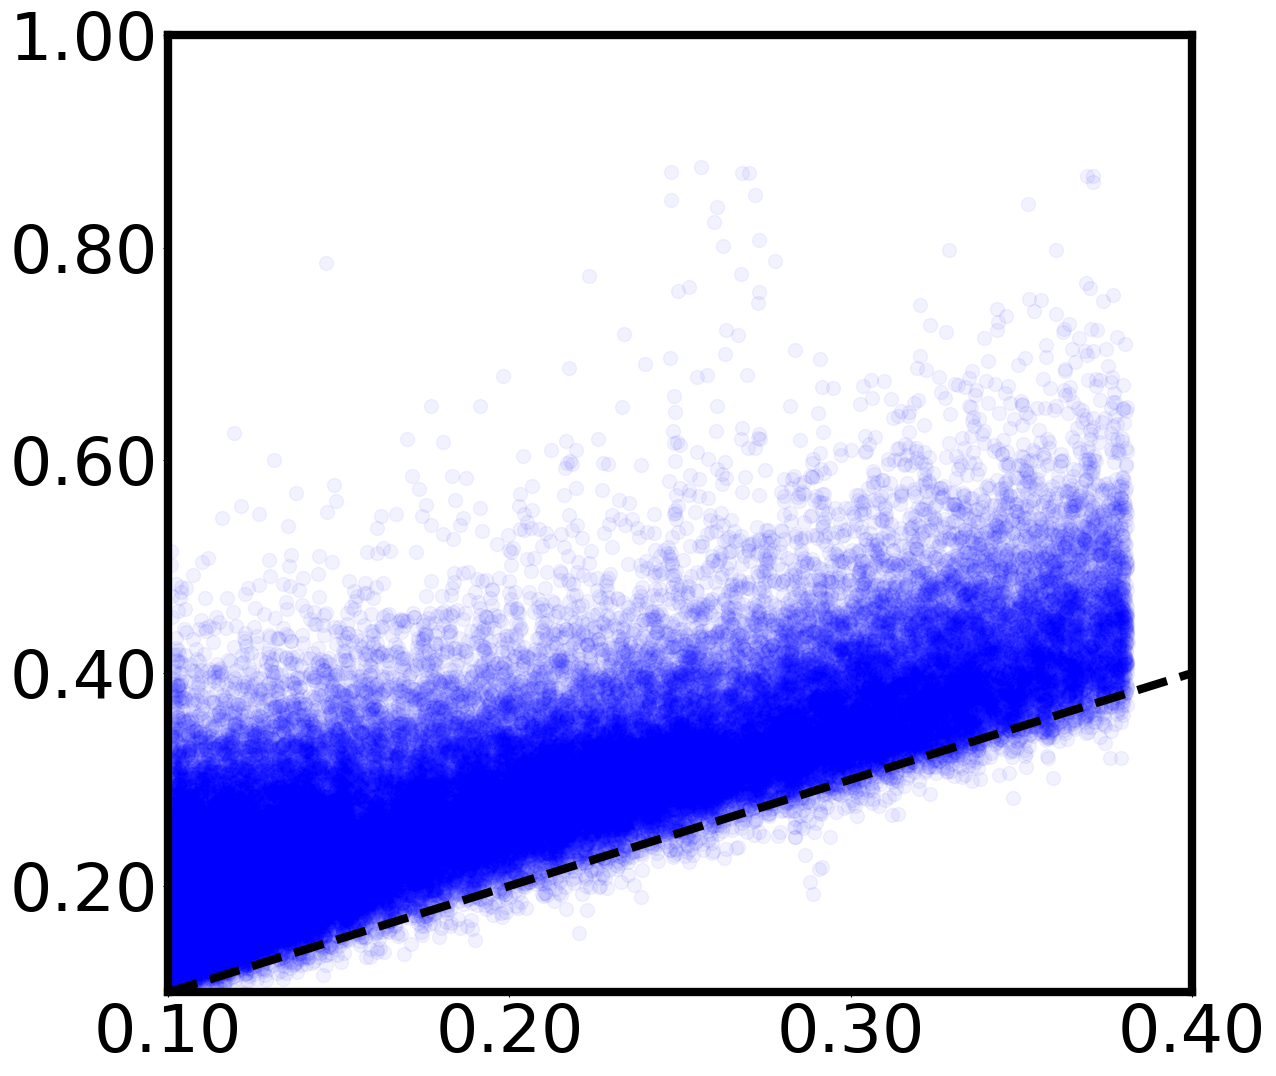

In [3]:
load_path = f"../../results/sequence_substitution/hlv_chr9_chr10_atac_perturb_exp_100kb_insert.npz"

save_perturb = np.load(load_path)

perturb_preds = save_perturb["perturb_preds"]
noperturb_preds = save_perturb["noperturb_preds"]

random_idx = np.random.choice(np.arange(0, len(perturb_preds), 1), size=(1000,), replace=False)

rs = ranksums(noperturb_preds[random_idx, 1], perturb_preds[random_idx, 1], alternative='less')
print(rs)

increase = 0
decrease = 0
no_change = 0
for i in range(len(perturb_preds)):
    if perturb_preds[i, 1] > noperturb_preds[i, 1]:
        increase += 1
    elif perturb_preds[i, 1] < noperturb_preds[i, 1]:
        decrease += 1
    elif perturb_preds[i, 1] == noperturb_preds[i, 1]:
        no_change += 1

total = float(increase + decrease + no_change)

print(f"Increase fraction: {increase/total}")
print(f"Decrease fraction: {decrease/total}")
print(f"No change fraction: {no_change/total}")
        
figure, axis = plt.subplots(1, 1, figsize=(14, 12))

for ax in ['top','bottom','left','right']:
    axis.spines[ax].set_linewidth(6)

axis.scatter(noperturb_preds[:, 1], perturb_preds[:, 1], color="blue", alpha=0.05, s=100)
axis.set_ylim([0.1, 1.0])
axis.set_yticks([0.20, 0.40, 0.60, 0.80, 1.00])
axis.set_yticklabels(["0.20", "0.40", "0.60", "0.80", "1.00"])

axis.set_xlim([0.1, 0.4])
axis.set_xticks([0.10, 0.20, 0.30, 0.40])
axis.set_xticklabels(["0.10", "0.20", "0.30", "0.40"])

axis.plot([0, 1], [0, 1], '--', c='black', linewidth=6)
plt.tight_layout()
plt.savefig(f"../../figures/sequence_substitution/hrv_atac_insert_in_middle.png", transparent=True)
plt.show()

## Sequence substitution experiment replacing ATAC peaks from top sequences to middle sequence

RanksumsResult(statistic=11.864203860979151, pvalue=9.081094845612871e-33)
Increase fraction: 0.07825782140040312
Decrease fraction: 0.9217421785995968
No change fraction: 0.0


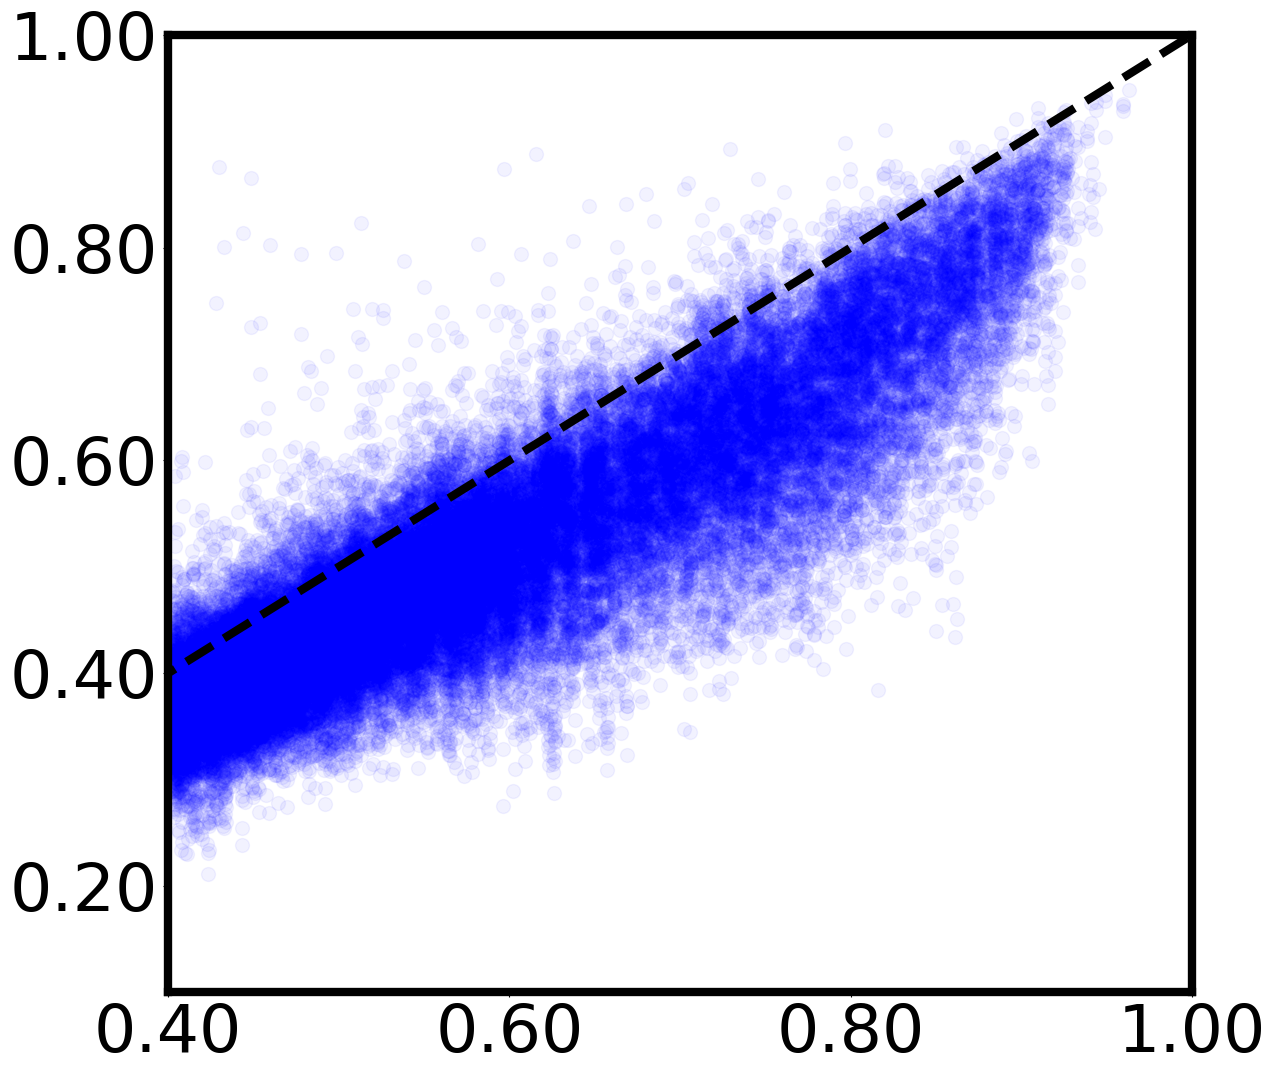

In [4]:
load_path = f"../../results/sequence_substitution/hlv_chr9_chr10_atac_perturb_exp_100kb_reverse.npz"

save_perturb = np.load(load_path)

perturb_preds = save_perturb["perturb_preds"]
noperturb_preds = save_perturb["noperturb_preds"]

random_idx = np.random.choice(np.arange(0, len(perturb_preds), 1), size=(1000,), replace=False)

rs = ranksums(noperturb_preds[random_idx, 1], perturb_preds[random_idx, 1], alternative='greater')
print(rs)

increase = 0
decrease = 0
no_change = 0
for i in range(len(perturb_preds)):
    if perturb_preds[i, 1] > noperturb_preds[i, 1]:
        increase += 1
    elif perturb_preds[i, 1] < noperturb_preds[i, 1]:
        decrease += 1
    elif perturb_preds[i, 1] == noperturb_preds[i, 1]:
        no_change += 1
        
total = float(increase + decrease + no_change)

print(f"Increase fraction: {increase/total}")
print(f"Decrease fraction: {decrease/total}")
print(f"No change fraction: {no_change/total}")
        

figure, axis = plt.subplots(1, 1, figsize=(14, 12))

for ax in ['top','bottom','left','right']:
    axis.spines[ax].set_linewidth(6)

axis.scatter(noperturb_preds[:, 1], perturb_preds[:, 1], color="blue", alpha=0.05, s=100)
axis.set_ylim([0.1, 1.0])
axis.set_yticks([0.20, 0.40, 0.60, 0.80, 1.00])
axis.set_yticklabels(["0.20", "0.40", "0.60", "0.80", "1.00"])

axis.set_xlim([0.4, 1.00])
axis.set_xticks([0.40, 0.60, 0.80, 1.00])
axis.set_xticklabels(["0.40", "0.60", "0.80", "1.00"])

axis.plot([0, 1], [0, 1], '--', c='black', linewidth=6)
plt.tight_layout()
plt.tight_layout()
plt.savefig(f"../../figures/sequence_substitution/hrv_atac_insert_in_top.png", transparent=True)
plt.show()

## AA interactions: Sequence substitution experiment inserting ATAC peaks from top sequences to middle sequence

RanksumsResult(statistic=-22.90963133208638, pvalue=1.8624161555488593e-116)
Increase fraction: 0.9475078992967078
Decrease fraction: 0.05249210070329222
No change fraction: 0.0


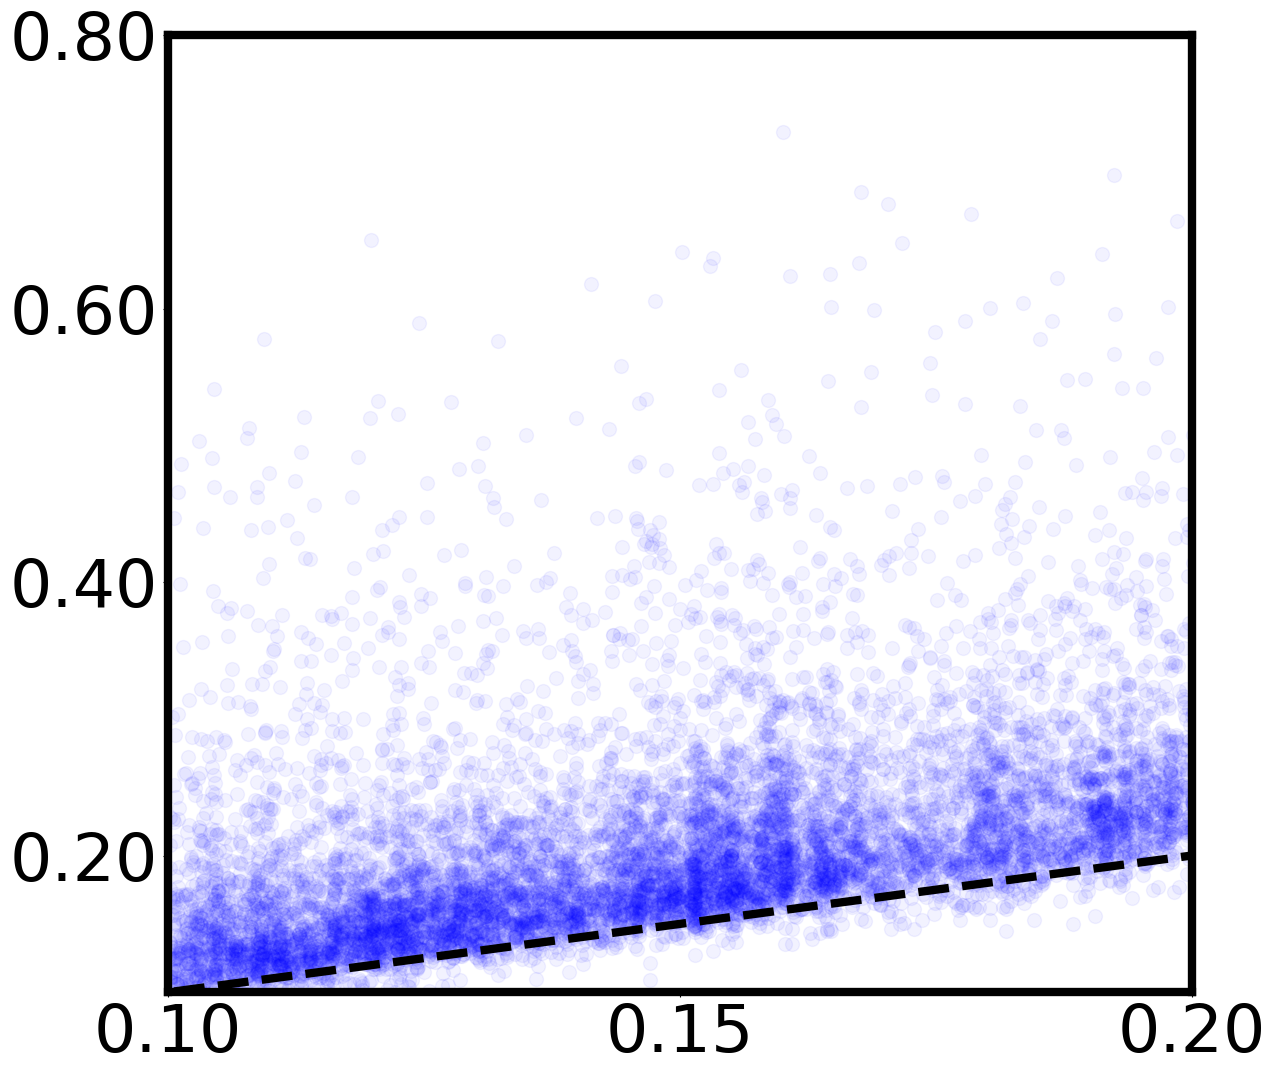

In [5]:
load_path = f"../../results/sequence_substitution/hlv_chr9_chr10_atac_perturb_exp_100kb_insert_AA.npz"

save_perturb = np.load(load_path)

perturb_preds = save_perturb["perturb_preds"]
noperturb_preds = save_perturb["noperturb_preds"]

random_idx = np.random.choice(np.arange(0, len(perturb_preds), 1), size=(1000,), replace=False)

rs = ranksums(noperturb_preds[random_idx, 1], perturb_preds[random_idx, 1], alternative='less')
print(rs)

increase = 0
decrease = 0
no_change = 0
for i in range(len(perturb_preds)):
    if perturb_preds[i, 1] > noperturb_preds[i, 1]:
        increase += 1
    elif perturb_preds[i, 1] < noperturb_preds[i, 1]:
        decrease += 1
    elif perturb_preds[i, 1] == noperturb_preds[i, 1]:
        no_change += 1

total = float(increase + decrease + no_change)

print(f"Increase fraction: {increase/total}")
print(f"Decrease fraction: {decrease/total}")
print(f"No change fraction: {no_change/total}")
        

figure, axis = plt.subplots(1, 1, figsize=(14, 12))

for ax in ['top','bottom','left','right']:
    axis.spines[ax].set_linewidth(6)

axis.scatter(noperturb_preds[:, 1], perturb_preds[:, 1], color="blue", alpha=0.05, s=100)
axis.set_ylim([0.1, 0.8])
axis.set_yticks([0.20, 0.40, 0.60, 0.80])
axis.set_yticklabels(["0.20", "0.40", "0.60", "0.80"])

axis.set_xlim([0.1, 0.2])
axis.set_xticks([0.10, 0.15, 0.20])
axis.set_xticklabels(["0.10", "0.15", "0.20"])

axis.plot([0, 1], [0, 1], '--', c='black', linewidth=6)
plt.tight_layout()
plt.savefig(f"../../figures/sequence_substitution/hlv_atac_insert_in_middle_AA.png", transparent=True)
plt.show()

## BB interactions: Sequence substitution experiment inserting ATAC peaks from top sequences to middle sequence

RanksumsResult(statistic=1.5723480393416687, pvalue=0.9420650711650845)
Increase fraction: 0.49142059058260174
Decrease fraction: 0.5085794094173982
No change fraction: 0.0


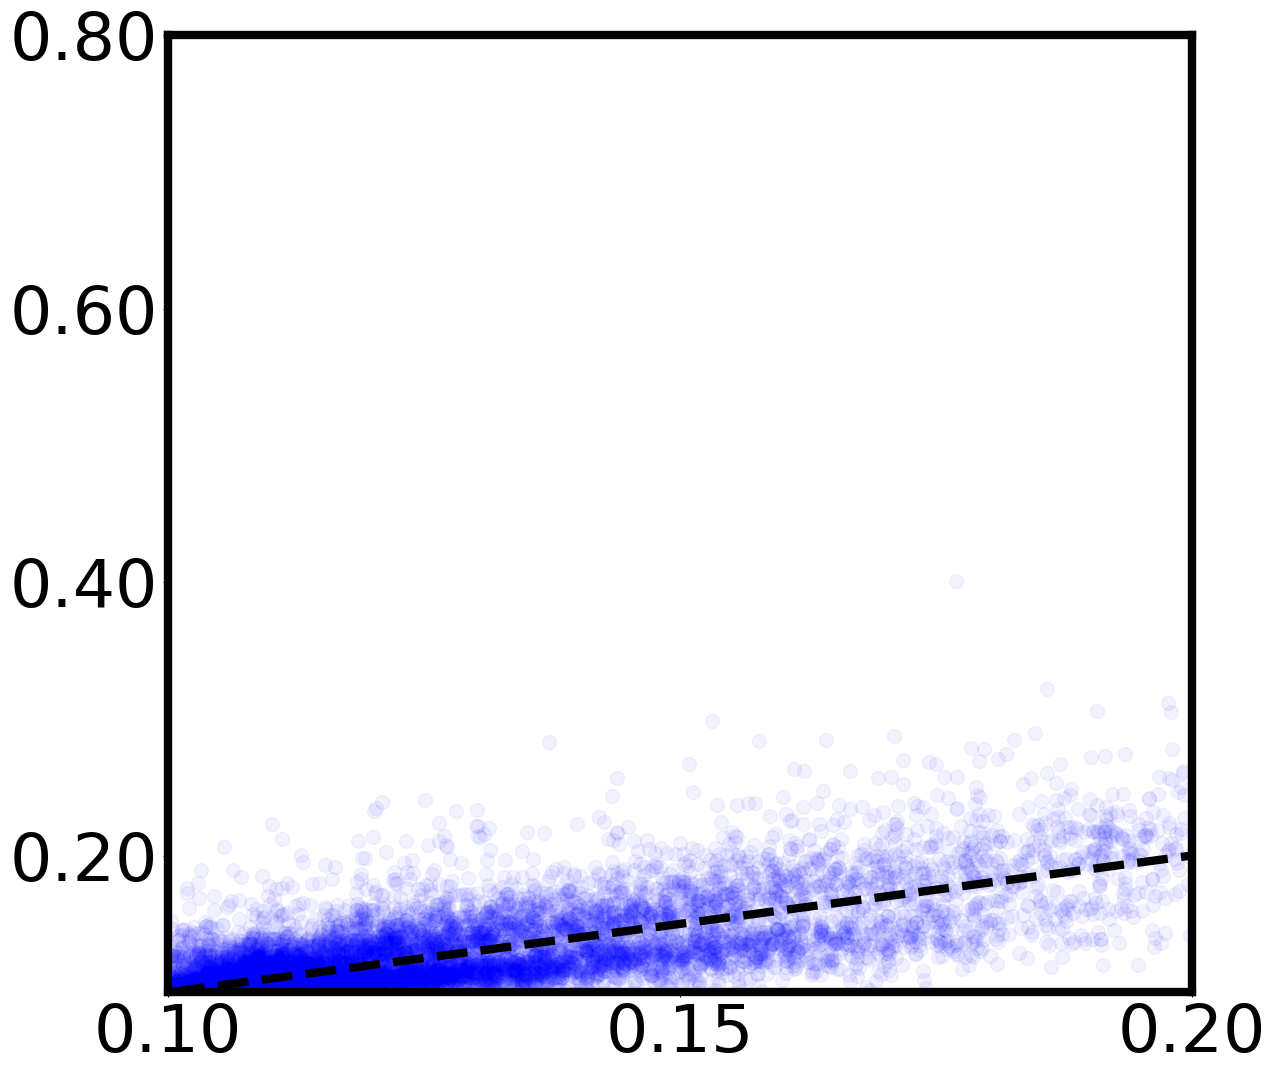

In [6]:
load_path = f"../../results/sequence_substitution/hlv_chr9_chr10_atac_perturb_exp_100kb_insert_BB.npz"

save_perturb = np.load(load_path)

perturb_preds = save_perturb["perturb_preds"]
noperturb_preds = save_perturb["noperturb_preds"]

random_idx = np.random.choice(np.arange(0, len(perturb_preds), 1), size=(1000,), replace=False)

rs = ranksums(noperturb_preds[random_idx, 1], perturb_preds[random_idx, 1], alternative='less')
print(rs)

increase = 0
decrease = 0
no_change = 0
for i in range(len(perturb_preds)):
    if perturb_preds[i, 1] > noperturb_preds[i, 1]:
        increase += 1
    elif perturb_preds[i, 1] < noperturb_preds[i, 1]:
        decrease += 1
    elif perturb_preds[i, 1] == noperturb_preds[i, 1]:
        no_change += 1

total = float(increase + decrease + no_change)

print(f"Increase fraction: {increase/total}")
print(f"Decrease fraction: {decrease/total}")
print(f"No change fraction: {no_change/total}")
        

figure, axis = plt.subplots(1, 1, figsize=(14, 12))

for ax in ['top','bottom','left','right']:
    axis.spines[ax].set_linewidth(6)

axis.scatter(noperturb_preds[:, 1], perturb_preds[:, 1], color="blue", alpha=0.05, s=100)
axis.set_ylim([0.1, 0.8])
axis.set_yticks([0.20, 0.40, 0.60, 0.80])
axis.set_yticklabels(["0.20", "0.40", "0.60", "0.80"])

axis.set_xlim([0.1, 0.2])
axis.set_xticks([0.10, 0.15, 0.20])
axis.set_xticklabels(["0.10", "0.15", "0.20"])

axis.plot([0, 1], [0, 1], '--', c='black', linewidth=6)
plt.tight_layout()
plt.savefig(f"../../figures/sequence_substitution/hlv_atac_insert_in_middle_BB.png", transparent=True)
plt.show()

## AB/BA interactions: Sequence substitution experiment inserting ATAC peaks from top sequences to middle sequence

RanksumsResult(statistic=-3.5273286467678124, pvalue=0.0002098876853757448)
Increase fraction: 0.6191839971801198
Decrease fraction: 0.38081600281988015
No change fraction: 0.0


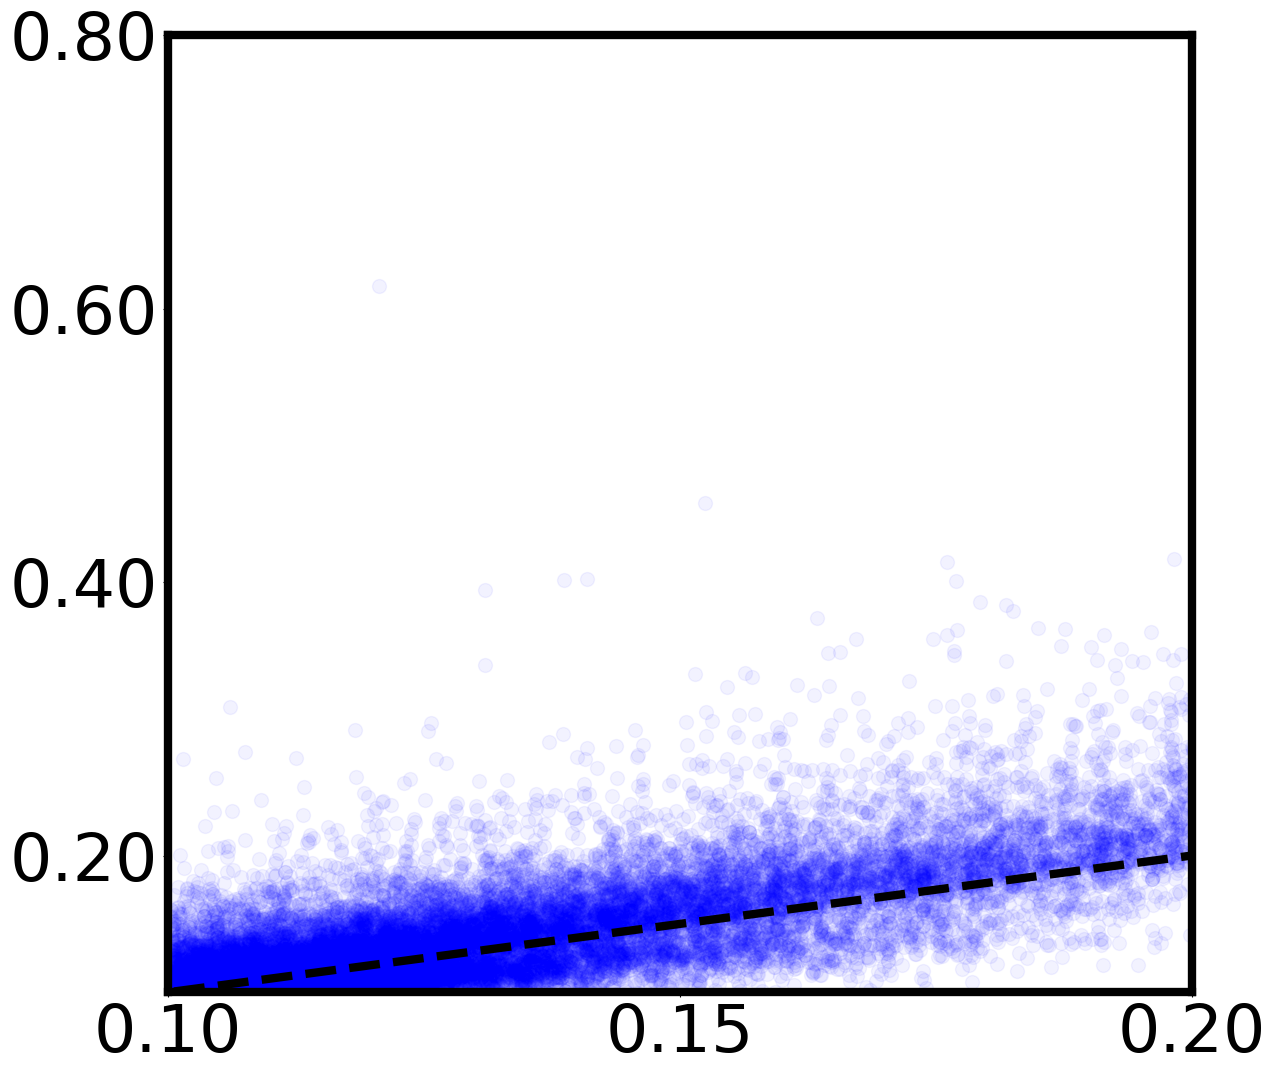

In [7]:
load_path_BA = f"../../results/sequence_substitution/hlv_chr9_chr10_atac_perturb_exp_100kb_insert_BA.npz"

save_perturb_BA = np.load(load_path_BA)

perturb_preds_BA = save_perturb_BA["perturb_preds"]
noperturb_preds_BA = save_perturb_BA["noperturb_preds"]

load_path_AB = f"../../results/sequence_substitution/hlv_chr9_chr10_atac_perturb_exp_100kb_insert_AB.npz"

save_perturb_AB = np.load(load_path)

perturb_preds_AB = save_perturb_AB["perturb_preds"]
noperturb_preds_AB = save_perturb_AB["noperturb_preds"]

perturb_preds = np.concatenate((perturb_preds_BA, perturb_preds_AB))
noperturb_preds = np.concatenate((noperturb_preds_BA, noperturb_preds_AB))

random_idx = np.random.choice(np.arange(0, len(perturb_preds), 1), size=(1000,), replace=False)

rs = ranksums(noperturb_preds[random_idx, 1], perturb_preds[random_idx, 1], alternative='less')
print(rs)

increase = 0
decrease = 0
no_change = 0
for i in range(len(perturb_preds)):
    if perturb_preds[i, 1] > noperturb_preds[i, 1]:
        increase += 1
    elif perturb_preds[i, 1] < noperturb_preds[i, 1]:
        decrease += 1
    elif perturb_preds[i, 1] == noperturb_preds[i, 1]:
        no_change += 1

total = float(increase + decrease + no_change)

print(f"Increase fraction: {increase/total}")
print(f"Decrease fraction: {decrease/total}")
print(f"No change fraction: {no_change/total}")
        

figure, axis = plt.subplots(1, 1, figsize=(14, 12))

for ax in ['top','bottom','left','right']:
    axis.spines[ax].set_linewidth(6)

axis.scatter(noperturb_preds[:, 1], perturb_preds[:, 1], color="blue", alpha=0.05, s=100)
axis.set_ylim([0.1, 0.8])
axis.set_yticks([0.20, 0.40, 0.60, 0.80])
axis.set_yticklabels(["0.20", "0.40", "0.60", "0.80"])

axis.set_xlim([0.1, 0.2])
axis.set_xticks([0.10, 0.15, 0.20])
axis.set_xticklabels(["0.10", "0.15", "0.20"])

axis.plot([0, 1], [0, 1], '--', c='black', linewidth=6)
plt.tight_layout()
plt.savefig(f"../../figures/sequence_substitution/hlv_atac_insert_in_middle_ABBA.png", transparent=True)
plt.show()